In [410]:
from lofo import LOFOImportance, Dataset, plot_importance
import warnings
warnings.simplefilter('ignore')

# pd.set_option('display.max_rows', 300)
import polars as pl
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR
from scipy.stats import linregress
from scipy.stats import entropy


import gc
import re
pd.set_option('display.max_columns', 50)

from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
from sklearn.metrics import mean_squared_error

from lofo import LOFOImportance, Dataset, plot_importance
import lightgbm as lgb

In [425]:
train_feats = pd.read_csv('train_916_feature.csv')
train_feats.shape

(2471, 916)

In [426]:
for dt in [train_feats]:
    
    dt['sent_len_ge_50_count_IKI_ median_Divid'] = dt['sent_len_ge_50_count'] / (dt['IKI_median'] + 1)
    dt['sent_word_count_mean_paragraph_word_count_mean_Divid'] = dt['sent_word_count_mean'] / (dt['paragraph_word_count_mean'] + 1)
    dt['sent_word_count_mean_cursor_position_diff_Enter_sum_Divid'] = dt['sent_word_count_mean']/dt['cursor_position_diff_Enter_sum'] + 1
    dt['down_event_8_cnt_cursor_position_diff_Enter_sum_Divid'] = dt['down_event_8_cnt'] / (dt['cursor_position_diff_Enter_sum'] + 1)
    dt['down_event_8_cnt_pauses_1_sec_Divid'] = dt['down_event_8_cnt'] / (dt['pauses_1_sec'] + 1)
    dt['word_count_diff_Input_mean_sent_len_std_Divid'] = dt['word_count_diff_Input_mean'] / (dt['sent_len_std'] + 1)
    dt['word_count_diff_Input_mean_paragraph_word_count_mean_Divid'] = dt['word_count_diff_Input_mean'] / (dt['paragraph_word_count_mean'] + 1)
    dt['word_count_diff_Input_mean_cursor_position_diff_Enter_sum_Divid'] = dt['word_count_diff_Input_mean'] / (dt['cursor_position_diff_Enter_sum'] + 1)
    dt['sent_len_std_cursor_position_diff_Leftclick_max_Divid'] = dt['sent_len_std'] / (dt['cursor_position_diff_Leftclick_max'] + 1)
    dt['sent_len_std_cursor_position_diff_Enter_sum_Divid'] = dt['sent_len_std'] / (dt['cursor_position_diff_Enter_sum'] + 1)
    dt['IKI_ median_sent_len_std_Divid'] = dt['IKI_median'] / (dt['sent_len_std'] + 1)
    dt['paragraph_word_count_mean_pauses_1_sec_Divid'] = dt['paragraph_word_count_mean'] / (dt['pauses_1_sec'] + 1)
    dt['word_len_max_IKI_ median_Divid'] = dt['word_len_max'] / (dt['IKI_median'] + 1)
    dt['word_len_max_pauses_1_sec_Divid'] = dt['word_len_max'] / (dt['pauses_1_sec'] + 1)
    dt['input_word_length_mean_IKI_ median_Divid'] = dt['input_word_length_mean'] / (dt['IKI_median'] + 1)
    dt['input_word_length_mean_cursor_position_diff_Enter_sum_Divid'] = dt['input_word_length_mean'] / (dt['cursor_position_diff_Enter_sum'] + 1)
    
    dt['sent_len_ge_50_count_time_diff_Input_mean_Div'] = dt['sent_len_ge_50_count'] / (dt['time_diff_Input_mean'] + 1)
    dt['P-bursts_count_time_diff_Input_mean_Div'] = dt['P-bursts_count'] / (dt['time_diff_Input_mean'] + 1)
    dt['pauses_1_sec_P-bursts_count_Divv'] = dt['pauses_1_sec'] / (dt['P-bursts_count'] + 1)
    dt['P-bursts_count_time_diff_abostrove_max_Div'] = dt['P-bursts_count'] / (dt['time_diff_abostrove_max'] + 1)
    dt['text_change_4_cnt_sent_len_ge_50_count_Div'] = dt['text_change_4_cnt'] / (dt['sent_len_ge_50_count'] + 1)
    dt['down_event_5_cnt_sent_len_ge_50_count_Div'] = dt['down_event_5_cnt'] / (dt['sent_len_ge_50_count'] + 1)
    dt['P-bursts_median_sent_len_ge_50_count_Div'] = dt['P-bursts_median'] / (dt['sent_len_ge_50_count'] + 1)



    dt['sent_len_std_cursor_position_diff_Enter_sum_Div'] = dt['sent_len_std'] / (dt['cursor_position_diff_Enter_sum'] + 1)
    dt['sent_len_std_time_diff_Backspace_median_Div'] = dt['sent_len_std'] / (dt['time_diff_Backspace_median'] + 1)
    dt['cursor_position_diff_Enter_sum_time_diff_Backspace_median_Div'] = dt['cursor_position_diff_Enter_sum'] / dt['time_diff_Backspace_median']
    dt['text_change_3_cnt_time_diff_Backspace_median_Div'] = dt['text_change_3_cnt'] / (dt['time_diff_Backspace_median'] + 1)
    dt['word_len_kurt_cursor_position_diff_Enter_sum_Div'] = dt['word_len_kurt'] / (dt['cursor_position_diff_Enter_sum'] + 1)
    dt['sent_len_median_cursor_position_diff_Enter_sum_Div'] = dt['sent_len_median'] / (dt['cursor_position_diff_Enter_sum'] + 1)
    dt['sent_len_median_time_diff_Backspace_median_Div'] = dt['sent_len_median'] / (dt['time_diff_Backspace_median'] + 1)
    dt['sent_len_median_paragraph_count_Div'] = dt['sent_len_median'] / (dt['paragraph_count'] + 1)
    dt['word_count_diff_Input_mean_sent_len_median_Div'] = dt['word_count_diff_Input_mean'] / (dt['sent_len_median'] + 1)
    dt['word_count_diff_Input_mean_text_change_3_cnt_Div'] = dt['word_count_diff_Input_mean'] / (dt['text_change_3_cnt'] + 1)
    dt['word_count_diff_Input_mean_word_len_max_Div'] = dt['word_count_diff_Input_mean'] / (dt['word_len_max'] + 1)
    dt['word_count_diff_Input_mean_paragraph_count_Div'] = dt['word_count_diff_Input_mean'] / (dt['paragraph_count'] + 1)
    dt['text_change_3_cnt_paragraph_len_last_Div'] = dt['text_change_3_cnt'] / (dt['paragraph_len_last'] + 1)

train_feats.shape

(2471, 952)

In [427]:
   # drop unique feature
unique_feature = []
for col in train_feats.columns:
    if (train_feats[col].value_counts().count() ==1):
        unique_feature.append(col)
        
columns_no_dublicated = (train_feats.copy().T.drop_duplicates().T).columns
dublicate_columns = np.setdiff1d( train_feats.columns, columns_no_dublicated)
# doplicate featurs
# train_feats.drop(unique_feature,axis=1,inplace=True)
print(f'{len(unique_feature)} FEATURES hase one value will be deleted .')
print(f'{len(dublicate_columns)} FEATURES  will be deleted')

train_feats = train_feats.drop(unique_feature, axis=1)
train_feats = train_feats.drop([col for col in dublicate_columns if col not in unique_feature],axis=1)

97 FEATURES hase one value will be deleted .
142 FEATURES  will be deleted


In [428]:
THRESHOLD = 0.99 # best 0.92 ,0.99
# Calculate the correlation matrix
correlation_matrix = train_feats.select_dtypes(exclude=object).corr().abs()  # Absolute correlation values

# Define a threshold for similarity (absolute correlation values)
similarity_threshold = THRESHOLD # Adjust this threshold as needed

# Extract similar features based on correlation coefficients
similar_feature_groups = []

for col in correlation_matrix.columns:
    similar_cols = correlation_matrix.index[correlation_matrix[col] > similarity_threshold].tolist()
    similar_cols.remove(col) if col in similar_cols else None  # Remove if present
    found_group = False
    for group in similar_feature_groups:
        if col in group or any(col in group for col in similar_cols):
            group.update(similar_cols)
            group.add(col)
            found_group = True
            break
    if not found_group and similar_cols:
        similar_feature_groups.append(set(similar_cols + [col]))

# Convert sets to tuples for each group of similar features
similar_feature_tuples = [list(group) for group in similar_feature_groups]

print("Groups of Similar Features:")
print(len(similar_feature_tuples), ' Group of Similars Features')
# 'time_diff_CapsLock_median', 'time_diff_Unidentified_std', 'time_diff_CapsLock_mean', 'time_diff_CapsLock_max'

extracted_features = []
for tup in similar_feature_tuples:
    # Extract the first element from each tuple
    for sub in tup[:-1]:
        extracted_features.append(sub)
print("Extracted Features")
print(f'{len(extracted_features)} FEATURES will deleted')

Groups of Similar Features:
63  Group of Similars Features
Extracted Features
197 FEATURES will deleted


In [429]:
train_feats.shape

(2471, 765)

In [430]:
features = [col for col in train_feats.select_dtypes(exclude=object) if col not in extracted_features + ['score']]
print('FEATURES : ', len(features))

FEATURES :  573


In [431]:
# drop this also calumns have value counts 2000
not_include_feature = [col for col in features if train_feats[col].value_counts().isin(np.arange(2470, 500,-1)).any()]

feature_names = [col for col in features if col not in not_include_feature]

# Prepare DataFrame for modelling

inf_columns = [col for col in feature_names if np.isinf(train_feats[col]).sum() > 0]
feature_names = [col for col in feature_names if col not in inf_columns]

print('FEATURES : ', len(feature_names))

FEATURES :  432


In [432]:
sc = MinMaxScaler() # MinMaxScaler or StandardScaler
train_feats[feature_names] = sc.fit_transform(train_feats[feature_names])
train_feats.fillna(0,inplace=True)

In [433]:
# Repeted LOFO
feature_importance = pd.read_csv('20_Dec_lofo_feature_importance_SVR_20_Fold_1.csv')
feature_names = list(feature_importance[feature_importance['importance_mean'] >= 0].feature)
print('FEATURES : ', len(feature_names))

FEATURES :  55


In [434]:
dataset = Dataset(df=train_feats, target="score", features=feature_names)

In [435]:
print('Number of Feature: ',len(dataset.feature_names))
print('Number of Group: ',len(dataset.feature_groups))

Number of Feature:  55
Number of Group:  0


In [436]:
svm_model  = SVR(C=1)

cv = KFold(n_splits=20, shuffle=True, random_state=42)
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="neg_mean_squared_error", model= svm_model)

In [437]:
# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

  0%|          | 0/55 [00:00<?, ?it/s]

In [438]:
importance_df.to_csv('20_Dec_lofo_feature_importance_SVR_20_Fold_2.csv',index=False)

In [439]:
print('done')

done


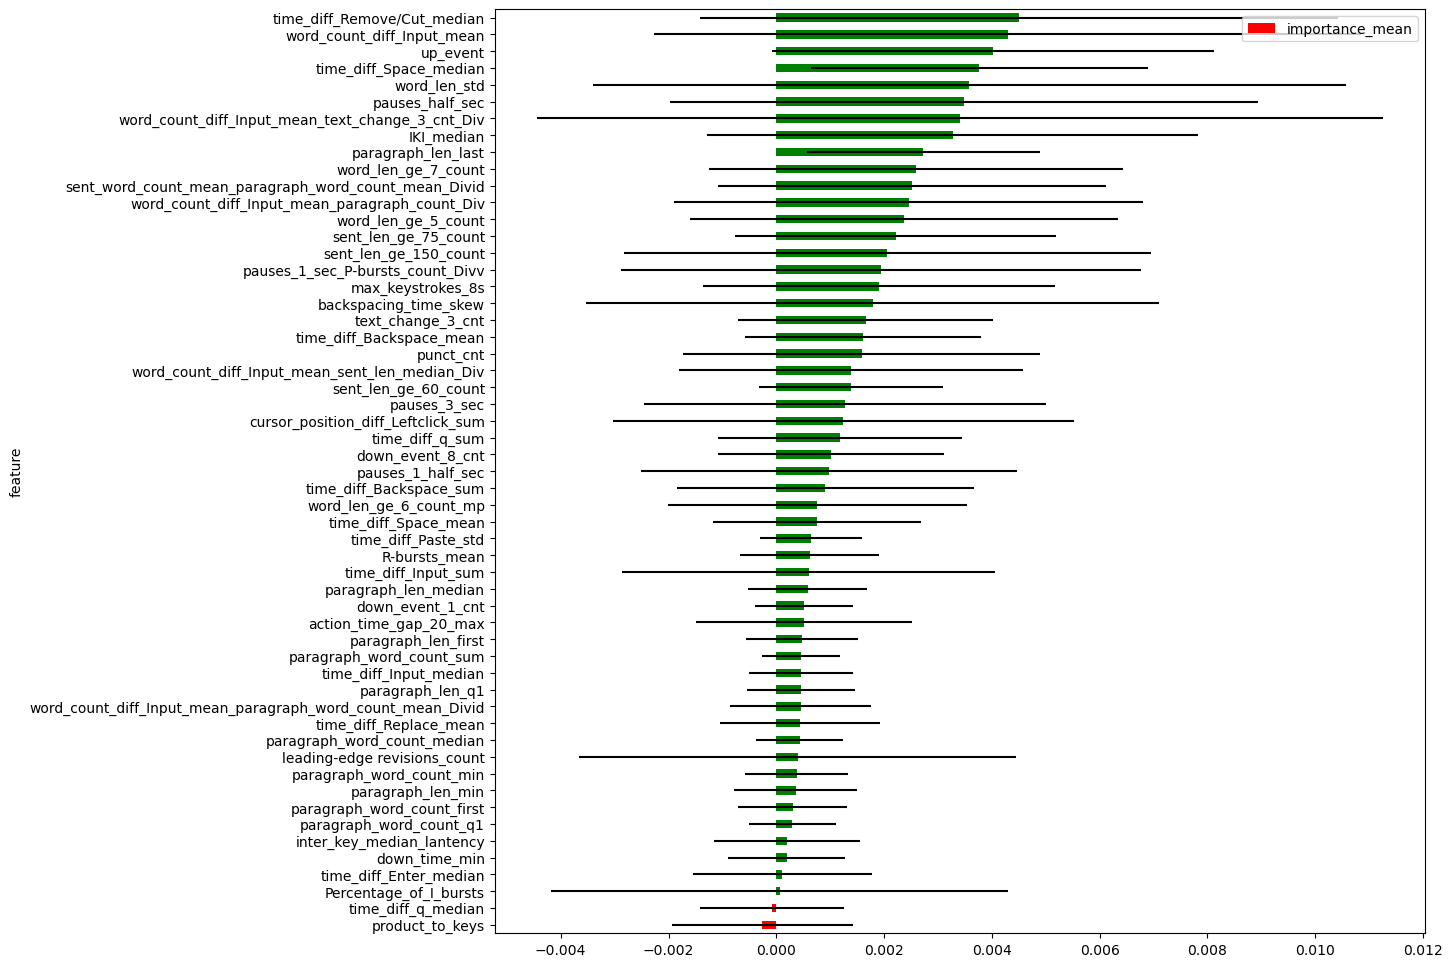

In [440]:
plot_importance(importance_df, figsize=(12, 12))

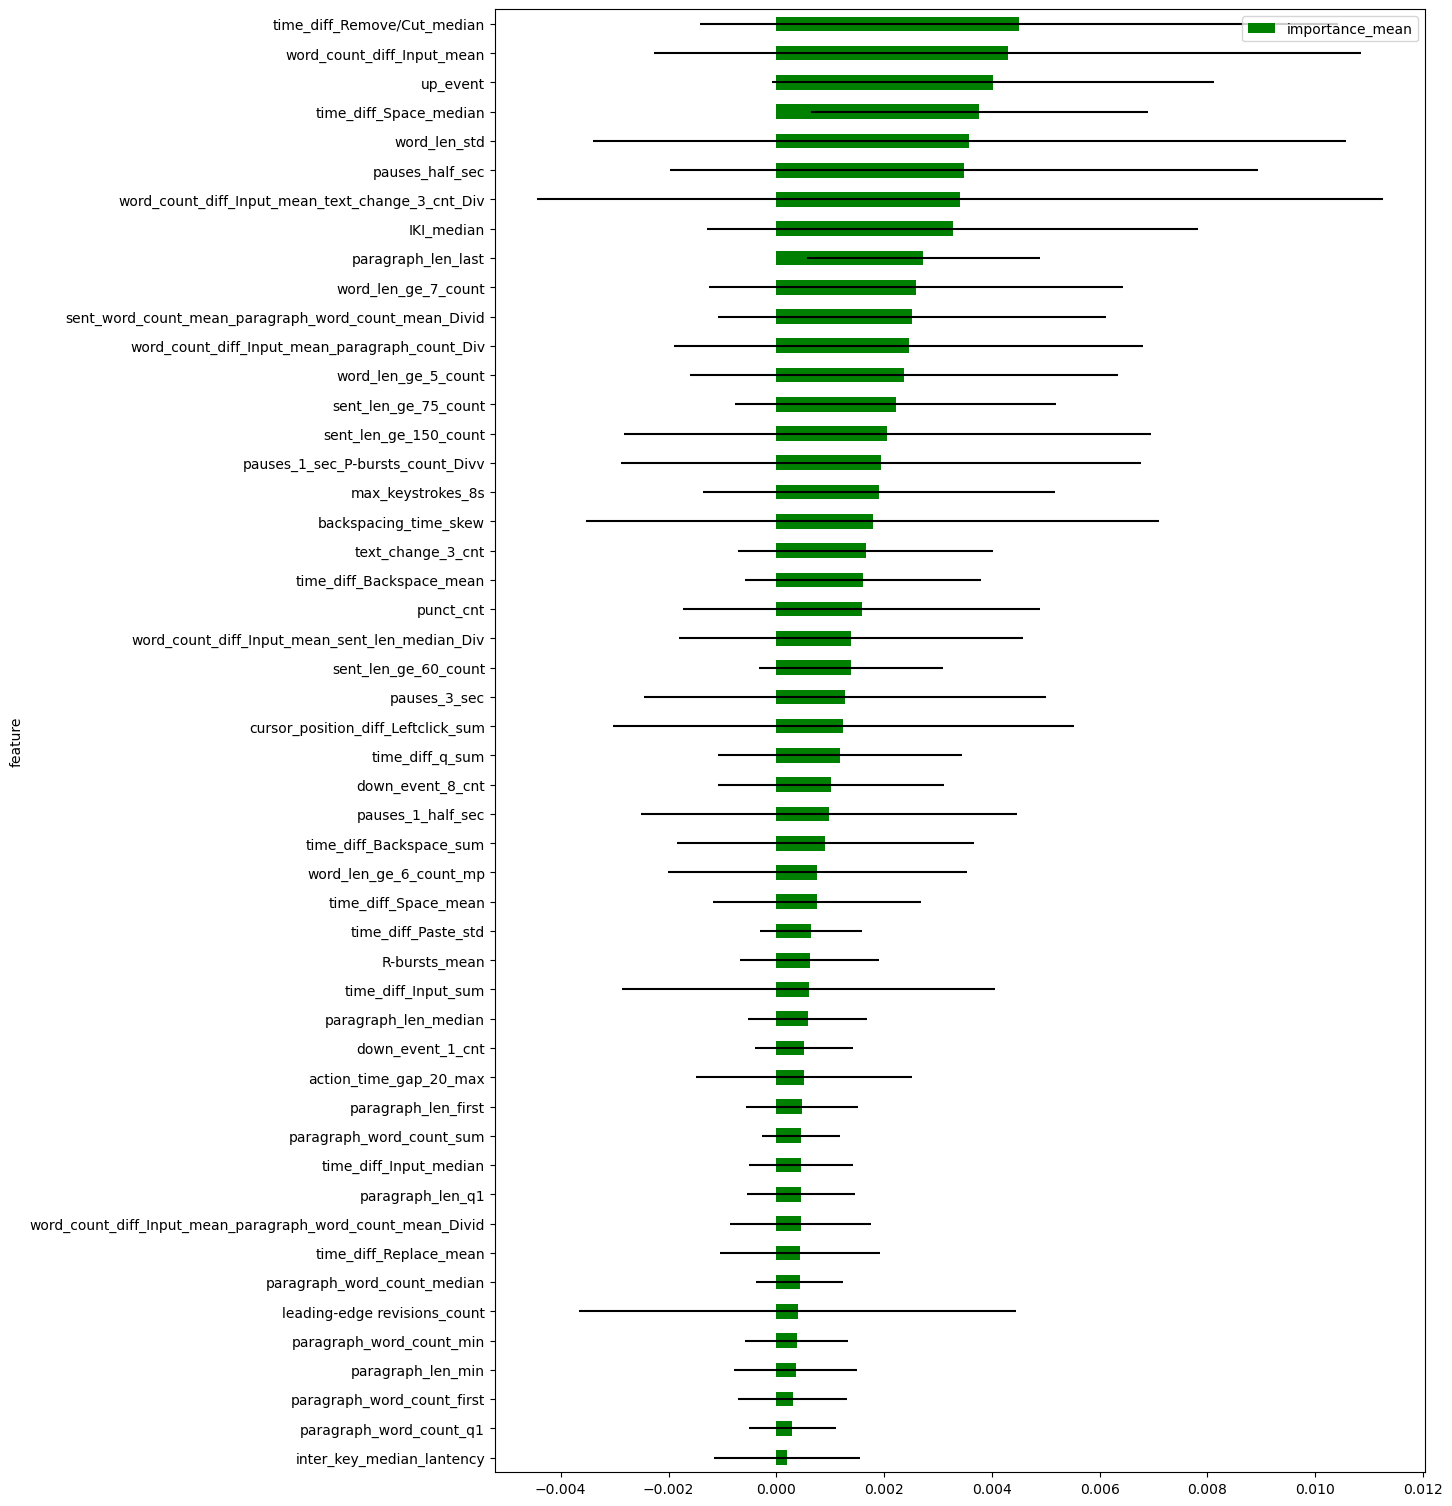

In [441]:
plot_importance(importance_df[:50], figsize=(12, 19))

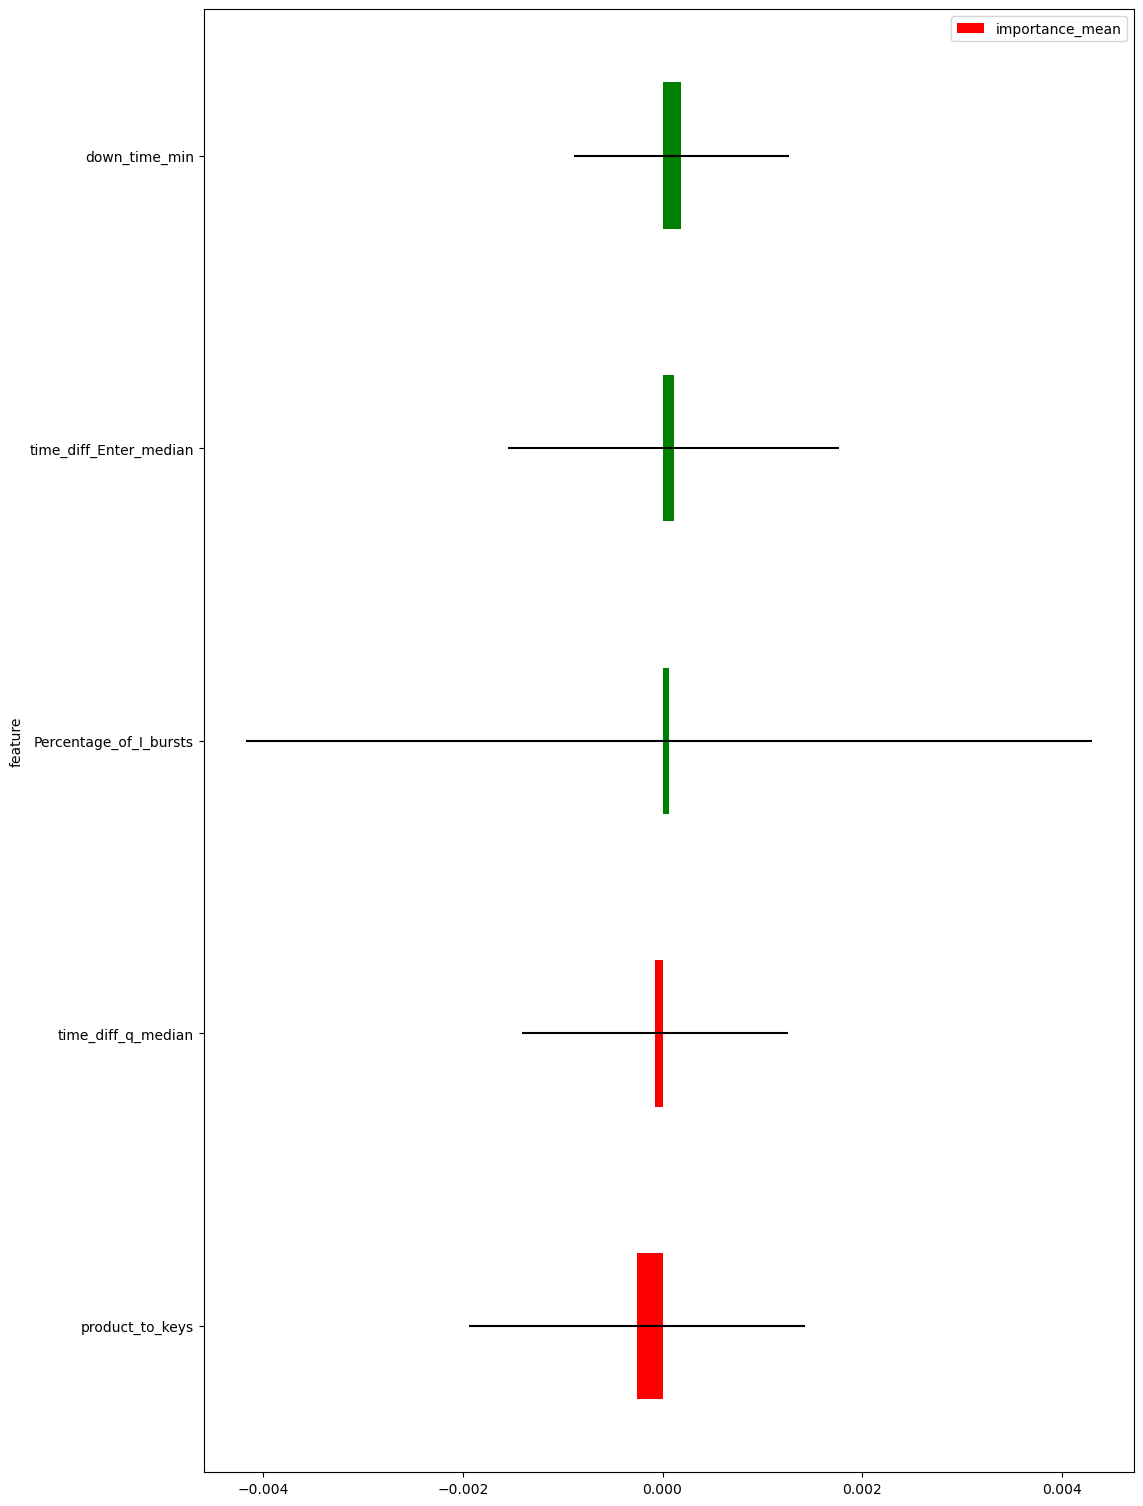

In [442]:
plot_importance(importance_df[50:100], figsize=(12, 19))

In [318]:
# plot_importance(importance_df[150:200], figsize=(12, 19))